# Liberty Mutual Kaggle Competition Exploratory Data Analysis (2015)

## March 2, 2018

## Hiro Miyake

This notebook deals with data provided in the [Liberty Mutual Kaggle competition](https://www.kaggle.com/c/liberty-mutual-group-property-inspection-prediction) held in 2015. Modeling is performed in the companion notebook.

# 1. Import modules and load the data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

#from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# 2. Preliminary look at the data

In [3]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1


In [4]:
test.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,6,2,13,4,C,A,Y,B,B,D,...,2,28,1,22,6,Y,N,E,2,7
1,7,10,10,7,N,C,Y,B,B,D,...,3,28,1,4,3,Y,N,E,5,8
2,8,9,20,4,N,H,Y,B,B,E,...,2,22,1,1,7,N,N,C,6,1
3,9,11,18,2,N,H,Y,B,B,D,...,4,40,1,20,6,Y,N,E,5,5
4,10,4,5,4,H,K,Y,B,B,E,...,2,34,1,11,7,Y,Y,E,2,1


We will be predicting on the `Hazard` variable.

We see that there are columns with numerical values as well as what appear to be categorical variables.

Let's explicitly look at the type of data in the dataframe.

In [5]:
print train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
Id        50999 non-null int64
Hazard    50999 non-null int64
T1_V1     50999 non-null int64
T1_V2     50999 non-null int64
T1_V3     50999 non-null int64
T1_V4     50999 non-null object
T1_V5     50999 non-null object
T1_V6     50999 non-null object
T1_V7     50999 non-null object
T1_V8     50999 non-null object
T1_V9     50999 non-null object
T1_V10    50999 non-null int64
T1_V11    50999 non-null object
T1_V12    50999 non-null object
T1_V13    50999 non-null int64
T1_V14    50999 non-null int64
T1_V15    50999 non-null object
T1_V16    50999 non-null object
T1_V17    50999 non-null object
T2_V1     50999 non-null int64
T2_V2     50999 non-null int64
T2_V3     50999 non-null object
T2_V4     50999 non-null int64
T2_V5     50999 non-null object
T2_V6     50999 non-null int64
T2_V7     50999 non-null int64
T2_V8     50999 non-null int64
T2_V9     50999 non-null int64
T2_V10    

We can get summary statistics on the numerical columns.

In [6]:
train.describe()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000
mean,50929.727897,4.022785,9.722093,12.847585,3.186004,7.020451,13.996255,1.578521,57.580051,12.419616,10.259495,1.948215,33.487755,1.032236,12.493029,4.496520,2.451126,3.484480
std,29314.685894,4.021194,5.167943,6.255743,1.739369,3.595279,4.647499,0.862882,23.499818,4.783411,4.852008,0.800117,5.834038,0.195893,7.314788,1.896717,1.260074,3.076745
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25660.500000,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,50977.000000,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,56.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76268.500000,5.000000,14.000000,18.000000,4.000000,8.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


We can get the names of these numerical columns as follows.

In [7]:
print train.describe().columns
print train.describe().columns[0]

Index([u'Id', u'Hazard', u'T1_V1', u'T1_V2', u'T1_V3', u'T1_V10', u'T1_V13',
       u'T1_V14', u'T2_V1', u'T2_V2', u'T2_V4', u'T2_V6', u'T2_V7', u'T2_V8',
       u'T2_V9', u'T2_V10', u'T2_V14', u'T2_V15'],
      dtype='object')
Id


Now I combine the training and test data into a single dataframe for feature massaging.

In [8]:
data = pd.concat([train.drop('Hazard', axis = 1), test], axis = 0)

## Note that in the above concatenation step, the indices are unchanged
## To reset the indices so that they make sense, take the tip from the following link
## and use the following line of code
## https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects
data.reset_index(inplace=True, drop=True)

data.head(10)

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,15,3,2,N,B,N,B,B,D,...,2,37,1,11,6,Y,N,E,2,2
1,2,16,14,5,H,B,N,B,B,C,...,2,22,1,18,5,Y,Y,E,2,1
2,3,10,10,5,N,K,N,B,B,E,...,6,37,2,14,6,Y,Y,E,6,1
3,4,18,18,5,N,K,N,B,B,E,...,2,25,1,1,6,Y,N,C,2,6
4,5,13,19,5,N,H,N,B,B,E,...,1,22,1,2,7,N,N,E,1,1
5,12,14,12,2,N,K,N,B,B,E,...,1,37,1,5,7,N,N,A,1,9
6,15,8,17,1,E,K,N,B,B,E,...,2,25,1,20,3,Y,N,D,2,11
7,19,14,20,4,E,K,N,B,B,E,...,2,40,1,18,7,Y,N,E,3,2
8,21,8,2,2,W,C,N,D,B,D,...,1,34,1,13,5,N,N,A,2,1
9,22,5,4,3,B,I,N,D,B,F,...,4,40,1,6,3,Y,Y,E,4,1


# 3. Look at the columns with numerical variables

Get a dataframe of just the numerical variables.

In [9]:
col_num = list(data.describe().columns)
data_num = data.copy()
for i in data:
    if i not in col_num:
        data_num.drop(i, axis = 1, inplace = True)
data_num.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
0,1,15,3,2,7,15,1,36,11,10,2,37,1,11,6,2,2
1,2,16,14,5,12,10,3,78,10,17,2,22,1,18,5,2,1
2,3,10,10,5,12,15,1,71,21,13,6,37,2,14,6,6,1
3,4,18,18,5,3,15,1,71,13,15,2,25,1,1,6,2,6
4,5,13,19,5,7,10,1,75,10,11,1,22,1,2,7,1,1


Get the number of unique values for each of the numerical columns.

In [10]:
for i in data_num:
    print 'Number of unique ' + i + ' values: ' + str(len(data_num[i].unique()))

Number of unique Id values: 101999
Number of unique T1_V1 values: 19
Number of unique T1_V2 values: 24
Number of unique T1_V3 values: 9
Number of unique T1_V10 values: 5
Number of unique T1_V13 values: 4
Number of unique T1_V14 values: 5
Number of unique T2_V1 values: 100
Number of unique T2_V2 values: 39
Number of unique T2_V4 values: 22
Number of unique T2_V6 values: 7
Number of unique T2_V7 values: 7
Number of unique T2_V8 values: 3
Number of unique T2_V9 values: 25
Number of unique T2_V10 values: 7
Number of unique T2_V14 values: 7
Number of unique T2_V15 values: 12


Here again are summary statistics of the numerical variables.

In [11]:
data_num.describe()

,Id,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000,101999.000000
mean,51000.000000,9.716693,12.866126,3.188531,7.035147,13.994353,1.581417,57.639849,12.435230,10.240002,1.950117,33.488260,1.032461,12.501387,4.489652,2.453269,3.483544
std,29444.719391,5.169488,6.242991,1.739655,3.593765,4.654340,0.863821,23.494165,4.802507,4.847544,0.796459,5.826087,0.194926,7.321876,1.895475,1.257543,3.071123
min,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25500.500000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,51000.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,56.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76499.500000,14.000000,18.000000,4.000000,12.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


## 3.1 Plotting histograms of the variable values

We can plot a histogram of the numerical values for the `T1_V1` variable.

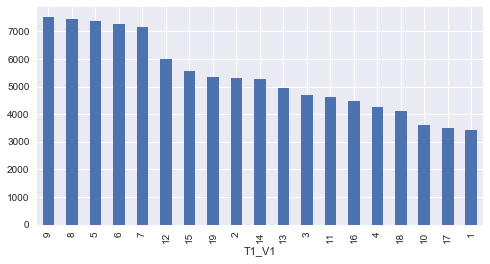

In [12]:
## https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
figwidth = 8
figheight = 4
plt.rcParams["figure.figsize"] = [figwidth, figheight]
data_num['T1_V1'].value_counts().plot(kind='bar')
plt.xlabel('T1_V1')
plt.show()

We can also plot multiple histograms and line them up.

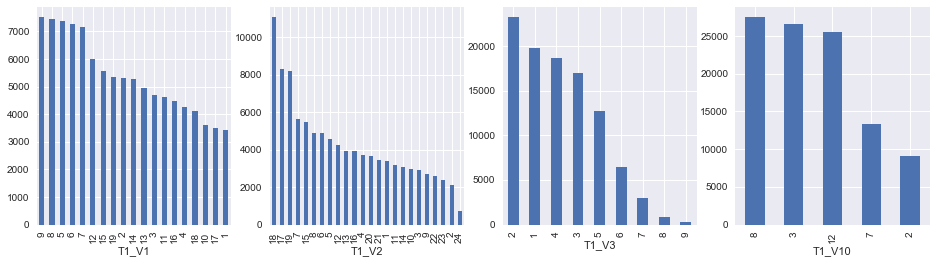

In [13]:
## Tips on subplots
## https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
## https://matplotlib.org/users/pyplot_tutorial.html
## https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html
## https://matplotlib.org/examples/pylab_examples/subplots_demo.html

## Controlling the size of plots/subplots
## https://stackoverflow.com/questions/29589119/plot-width-settings-in-ipython-notebook
## https://stackoverflow.com/questions/17230797/how-to-set-the-matplotlib-figure-default-size-in-ipython-notebook/17231361#17231361

rownum = 1
colnum = 4
figwidth = 16
figheight = 4
plt.rcParams["figure.figsize"] = [figwidth, figheight]
plt.subplot(rownum,colnum,1)
data_num['T1_V1'].value_counts().plot(kind='bar')
plt.xlabel('T1_V1')
plt.subplot(rownum,colnum,2)
data_num['T1_V2'].value_counts().plot(kind='bar')
plt.xlabel('T1_V2')
plt.subplot(rownum,colnum,3)
data_num['T1_V3'].value_counts().plot(kind='bar')
plt.xlabel('T1_V3')
plt.subplot(rownum,colnum,4)
data_num['T1_V10'].value_counts().plot(kind='bar')
plt.xlabel('T1_V10')
plt.show()

Let's see what the shape of the dataframe is.

In [14]:
data_num.shape

(101999, 17)

So excluding the `Id` variable, there are 16 numerical variables. Then it makes sense to plot the distribution of these as a 4 by 4 plot.

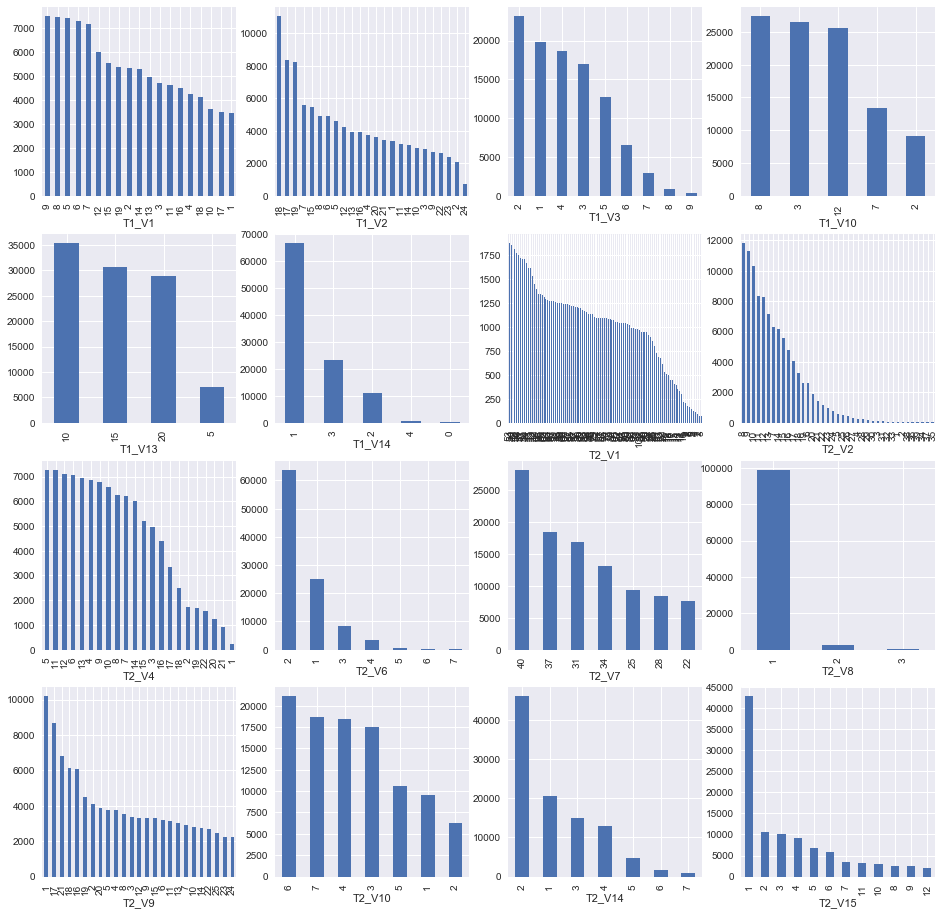

In [15]:
j = 1
figwidth = 16
figheight = 16
plt.rcParams["figure.figsize"] = [figwidth, figheight]
for i in data_num:
    if i != 'Id':
        #print i
        #if j > 4:
        #    break
        plt.subplot(4,4,j)
        data_num[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        j += 1
plt.show()

In [16]:
## The Seaborn pair plots don't seem to give much insight.
## Mostly probably because the numerical values are discrete.
## It seems to fill up the entire phase space.
## http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
#g = sns.pairplot(data_num.drop('Id', axis = 1))
#g = sns.pairplot(data[['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10']])

Let's also look at the target values in the `Hazard` variable.

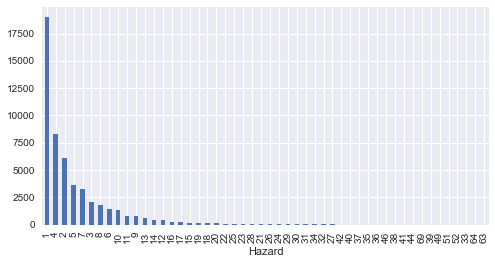

In [17]:
figwidth = 8
figheight = 4
plt.rcParams["figure.figsize"] = [figwidth, figheight]
train['Hazard'].value_counts().plot(kind='bar')
plt.xlabel('Hazard')
plt.show()

In [18]:
train['Hazard'].value_counts()

1     18981
4      8273
2      6145
5      3645
7      3284
3      2025
8      1783
6      1407
10     1311
11      800
9       739
13      560
14      389
12      379
16      235
17      194
15      174
19      138
18      103
20       98
22       71
25       44
23       42
28       32
21       31
26       25
24       14
29       14
30        9
31        8
34        8
32        6
27        5
42        4
40        2
37        2
35        2
36        2
46        2
38        2
41        2
44        1
69        1
39        1
49        1
51        1
52        1
33        1
64        1
63        1
Name: Hazard, dtype: int64

Interestingly, there are a few `Hazard` values that appear only once in the training set.

# 4. Look at the columns with categorical variables

Get a subset of the data frame where the columns have non-numeric values.

In [19]:
col_num = list(data.describe().columns)
data_cat = data.copy()
for i in col_num:
    if i != 'Id':
        data_cat.drop(i, axis = 1, inplace = True)
data_cat.head()

,Id,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V11,T1_V12,T1_V15,T1_V16,T1_V17,T2_V3,T2_V5,T2_V11,T2_V12,T2_V13
0,1,N,B,N,B,B,D,B,B,A,B,N,N,B,Y,N,E
1,2,H,B,N,B,B,C,B,B,A,B,Y,Y,C,Y,Y,E
2,3,N,K,N,B,B,E,H,B,A,R,Y,Y,C,Y,Y,E
3,4,N,K,N,B,B,E,H,B,A,R,N,N,A,Y,N,C
4,5,N,H,N,B,B,E,H,B,A,J,N,Y,B,N,N,E


Get the number of unique categorical values in each column.

In [20]:
for i in data_cat:
    print 'Number of unique ' + i + ' values: ' + str(len(data_cat[i].unique()))

Number of unique Id values: 101999
Number of unique T1_V4 values: 8
Number of unique T1_V5 values: 10
Number of unique T1_V6 values: 2
Number of unique T1_V7 values: 4
Number of unique T1_V8 values: 4
Number of unique T1_V9 values: 6
Number of unique T1_V11 values: 12
Number of unique T1_V12 values: 4
Number of unique T1_V15 values: 8
Number of unique T1_V16 values: 18
Number of unique T1_V17 values: 2
Number of unique T2_V3 values: 2
Number of unique T2_V5 values: 6
Number of unique T2_V11 values: 2
Number of unique T2_V12 values: 2
Number of unique T2_V13 values: 5


Let's look at the shape of the categorical variable dataframe.

In [21]:
data_cat.shape

(101999, 17)

So excluding the `Id` variable, there are 16 categorical variables. We can again plot a 4 by 4 histogram matrix.

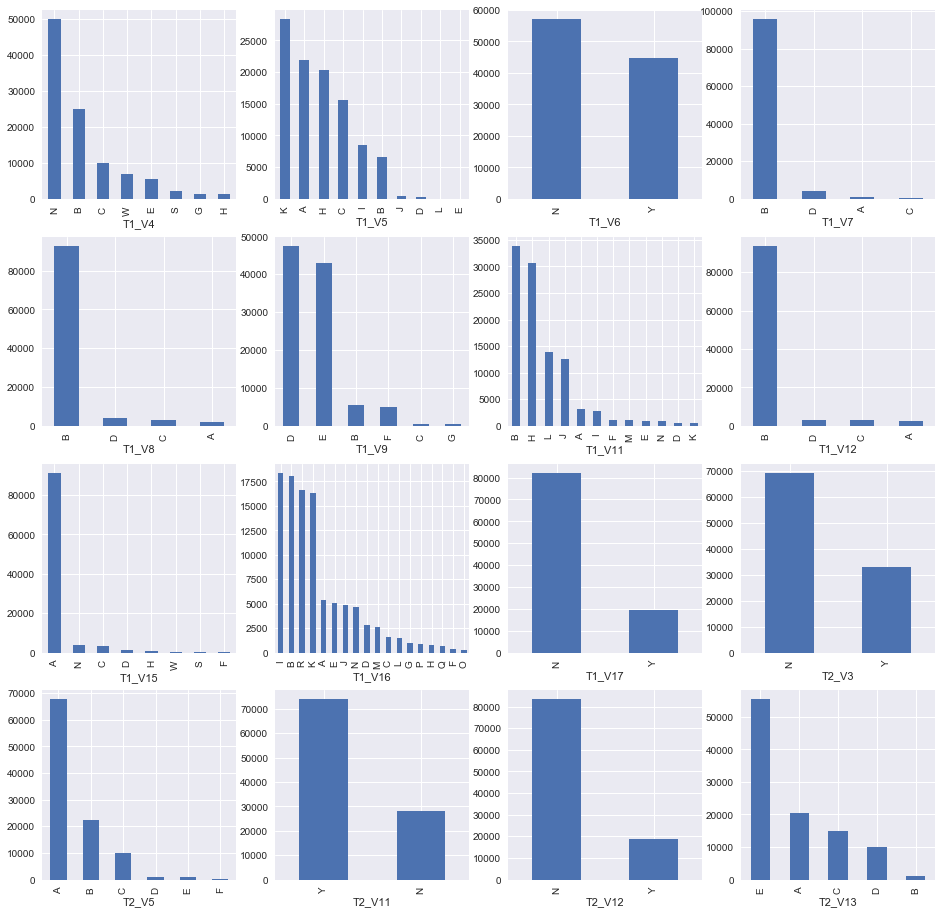

In [22]:
j = 1
figwidth = 16
figheight = 16
plt.rcParams["figure.figsize"] = [figwidth, figheight]
for i in data_cat:
    if i != 'Id':
        #print i
        #if j > 4:
        #    break
        plt.subplot(4,4,j)
        data_cat[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        j += 1
plt.show()

# 5. Beyond univariate exploratory data analysis

So far, I have only looked at the distribution of data within a single columns. That's interesting, but further insights may come from looking at the relationships between two or more variables. This is likely important in good feature engineering.